#VISUALISASI PEMBAGIAN DATA LATIH DAN UJI

In [1]:
import pandas as pd

file_path = 'labeling_vader.csv'
try:
    data = pd.read_csv(file_path, sep=';', on_bad_lines='warn', encoding='latin1')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, sep=';', on_bad_lines='warn', encoding='utf-8')

# --- untuk melihat jumlah data ---
print("\n--- Informasi Jumlah Data ---")
jumlah_baris = data.shape[0]
print(f"Total baris (data) dalam file adalah: {jumlah_baris}")
data.head(3)


--- Informasi Jumlah Data ---
Total baris (data) dalam file adalah: 704


,created_at,username,full_text,cleaning,case_folding,normalisasi,kata_baku,kata_tidak_baku,tokenize,stop_removal,stop_removal_joined,translated_data,Positive,Negative,Neutral,Compound,Sentiment
0,Thu Apr 10 05:13:17 +0000 2025,semutapi_media,Ini bukan efisiensi ini pengabaian sistematis ...,Ini bukan efisiensi ini pengabaian sistematis ...,ini bukan efisiensi ini pengabaian sistematis ...,ini bukan efisiensi ini pengabaian sistematis ...,[],[],"['ini', 'bukan', 'efisiensi', 'ini', 'pengabai...","['efisiensi', 'pengabaian', 'sistematis', 'kec...",efisiensi pengabaian sistematis kecerdasan ban...,efficiency of systematic abuse of the nation's...,"0,276","0,143","0,58","0,4404",Positive
1,Thu Apr 10 03:36:25 +0000 2025,Mudzkh,Mesin pengering tangan di wastafel toilet pada...,Mesin pengering tangan di wastafel toilet pada...,mesin pengering tangan di wastafel toilet pada...,mesin pengering tangan di wastafel toilet pada...,['tidak'],['g'],"['mesin', 'pengering', 'tangan', 'di', 'wastaf...","['mesin', 'pengering', 'tangan', 'wastafel', '...",mesin pengering tangan wastafel toilet dicopot...,the toilet sink hand dryer is removed by the o...,"0,186",0,"0,814","0,4939",Positive
2,Wed Apr 09 11:40:48 +0000 2025,RADARSOLO_,Dilema Pariwisata Solo Pasca Lebaran: Efisiens...,Dilema Pariwisata Solo Pasca Lebaran Efisiensi...,dilema pariwisata solo pasca lebaran efisiensi...,dilema pariwisata solo pasca lebaran efisiensi...,[],[],"['dilema', 'pariwisata', 'solo', 'pasca', 'leb...","['dilema', 'pariwisata', 'solo', 'pasca', 'leb...",dilema pariwisata solo pasca lebaran efisiensi...,solo tourism dilemma after the eid efficiency ...,"0,181","0,061","0,758","0,5106",Positive


In [2]:
# Import libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Load dataset
file_path = 'labeling_vader.csv'
try:
    data = pd.read_csv(file_path, sep=';', on_bad_lines='warn', encoding='latin1')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, sep=';', on_bad_lines='warn', encoding='utf-8')

# Drop missing values and make a copy to avoid SettingWithCopyWarning
cleaned_data = data.dropna(subset=['Sentiment', 'Positive', 'Negative', 'Neutral', 'Compound']).copy()

# Convert string numbers with commas to floats
cols_to_convert = ['Positive', 'Negative', 'Neutral', 'Compound']
for col in cols_to_convert:
    cleaned_data[col] = (
        cleaned_data[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .astype(float)
    )

# Feature matrix and target vector
X = cleaned_data[cols_to_convert]
y = cleaned_data['Sentiment']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode categorical target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Print dataset info
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))
print("=========================")

# Print shape of training and testing data
print(X_train.shape, X_test.shape)


Jumlah data latih: 1447
Jumlah data uji: 362
(1447, 4) (362, 4)


In [3]:
from collections import Counter

# Cek distribusi data sebelum dan sesudah SMOTE
print("Jumlah data sebelum SMOTE:", Counter(y))
print("Total sampel sebelum SMOTE:", sum(Counter(y).values()))
print("Jumlah data setelah SMOTE:", Counter(y_resampled))
print("Total sampel setelah SMOTE:", sum(Counter(y_resampled).values()))

# Tambahan penjelasan jumlah dan pembagian data
print("\nDataset awal = {} sampel".format(sum(Counter(y).values())))
print("Data ini tidak seimbang, dengan jumlah sentimen negatif, netral, dan positif tidak sama.")
print("SMOTE Menambah Data")
print("SMOTE mensintesis (bukan menduplikasi) sampel baru untuk kelas minoritas sehingga jumlah data bertambah.")

total_resampled = sum(Counter(y_resampled).values())
print(f"Hasilnya, jumlah total data setelah SMOTE menjadi {total_resampled}.")

# Hitung pembagian train-test
train_size = int(0.8 * total_resampled)
test_size = total_resampled - train_size

print("\nTrain-Test Split")
print(f"80% dari {total_resampled} = {train_size} (latih)")
print(f"20% dari {total_resampled} = {test_size} (uji)")


Jumlah data sebelum SMOTE: Counter({'Positive': 603, 'Negative': 70, 'Neutral': 31})
Total sampel sebelum SMOTE: 704
Jumlah data setelah SMOTE: Counter({np.int64(2): 603, np.int64(0): 603, np.int64(1): 603})
Total sampel setelah SMOTE: 1809

Dataset awal = 704 sampel
Data ini tidak seimbang, dengan jumlah sentimen negatif, netral, dan positif tidak sama.
SMOTE Menambah Data
SMOTE mensintesis (bukan menduplikasi) sampel baru untuk kelas minoritas sehingga jumlah data bertambah.
Hasilnya, jumlah total data setelah SMOTE menjadi 1809.

Train-Test Split
80% dari 1809 = 1447 (latih)
20% dari 1809 = 362 (uji)


In [4]:
#Mapping Data Sentiment
print("Mapping Sentiment ke Numerik:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

print("\nContoh y_encoded:", y_encoded[:50])  # Menampilkan 50 data pertama

Mapping Sentiment ke Numerik:
Negative -> 0
Neutral -> 1
Positive -> 2

Contoh y_encoded: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2]


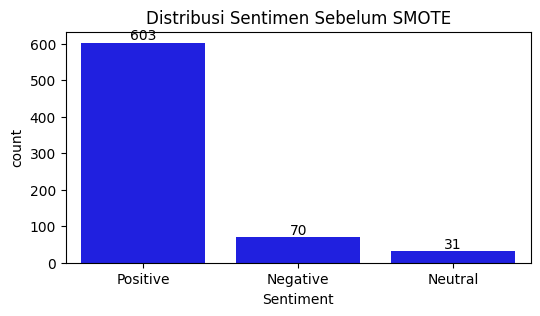

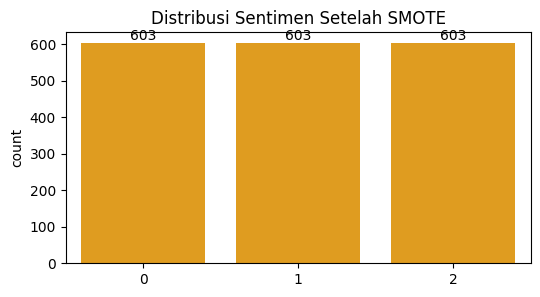

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Distribusi sebelum SMOTE
plt.figure(figsize=(6,3))
ax = sns.countplot(x=y, color='blue')
plt.title('Distribusi Sentimen Sebelum SMOTE')

# Menampilkan jumlah sampel di atas bar tanpa koma
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Distribusi setelah SMOTE
plt.figure(figsize=(6,3))
ax = sns.countplot(x=y_resampled, color='orange')
plt.title('Distribusi Sentimen Setelah SMOTE')

# Menampilkan jumlah sampel di atas bar tanpa koma
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Konversi hasil SMOTE ke DataFrame
#df_resampled = pd.DataFrame(X_resampled, columns=['Positive', 'Negative', 'Neutral', 'Compound'])
#df_resampled['Sentiment'] = label_encoder.inverse_transform(y_resampled)

# Simpan ke file CSV
#df_resampled.to_csv('smote_resampled.csv', index=False)
#print("File 'smote_resampled.csv' telah berhasil disimpan.")

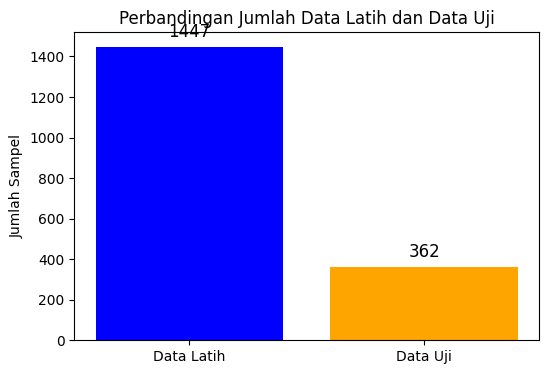

In [6]:
import matplotlib.pyplot as plt

# Data jumlah sampel
jumlah_data = [len(X_train), len(X_test)]
labels = ['Data Latih', 'Data Uji']

# Membuat bar plot
plt.figure(figsize=(6, 4))
plt.bar(labels, jumlah_data, color=['blue', 'orange'])
plt.ylabel('Jumlah Sampel')
plt.title('Perbandingan Jumlah Data Latih dan Data Uji')

# Menampilkan jumlah di atas bar
for i, v in enumerate(jumlah_data):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12)

plt.show()

# MODEL CLASSIC DAN NN + CLASSIC MODEL

Preprosessing Target dan Uji Classic Model

In [7]:
# Import libraries
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC  # SVM
import pandas as pd
import numpy as np

# Load dataset
file_path = 'labeling_vader.csv'
try:
    data = pd.read_csv(file_path, sep=';', on_bad_lines='warn', encoding='latin1')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, sep=';', on_bad_lines='warn', encoding='utf-8')

# Drop missing values and copy
cleaned_data = data.dropna(subset=['Sentiment', 'Positive', 'Negative', 'Neutral', 'Compound']).copy()

# Convert numeric columns (replace ',' with '.' and cast to float)
cols_to_convert = ['Positive', 'Negative', 'Neutral', 'Compound']
for col in cols_to_convert:
    cleaned_data.loc[:, col] = (
        cleaned_data[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .astype(float)
    )

# Select features and target
X = cleaned_data[cols_to_convert]
y = cleaned_data['Sentiment']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [8]:
# from sklearn.svm import SVC # SVM
# from sklearn.neighbors import KNeighborsClassifier # KNN
# from sklearn.naive_bayes import GaussianNB # Gau Naive Bayes
# from sklearn.metrics import accuracy_score, classification_report

# # Define models
# models = {
#     "SVM": SVC(kernel='linear', probability=True, C=1, random_state=42),
#     "KNN": KNeighborsClassifier(n_neighbors=5),
#     "Naive Bayes": GaussianNB()
# }

# # Train dan Evaluasi models
# results = {}
# predictions = {}

# print("--- Memulai Pelatihan dan Evaluasi Model ---")
# for model_name, model in models.items():
#     print(f"\nMelatih dan mengevaluasi {model_name}...")

#     # Latih model
#     model.fit(X_train, y_train)

#     # --- Uji Overfitting ---
#     # Prediksi pada data latih
#     y_train_pred = model.predict(X_train)
#     train_accuracy = accuracy_score(y_train, y_train_pred)

#     # Prediksi pada data uji
#     y_test_pred = model.predict(X_test)
#     test_accuracy = accuracy_score(y_test, y_test_pred)

#     # Simpan hasil untuk model ini
#     results[model_name] = {
#         'train_accuracy': train_accuracy,
#         'test_accuracy': test_accuracy,
#         'y_test_pred': y_test_pred
#     }

#     # Untuk probabilitas (opsional, jika diperlukan untuk analisis lebih lanjut)
#     y_proba = None
#     if hasattr(model, "predict_proba"):
#         try:
#             y_proba = model.predict_proba(X_train)
#         except Exception as e:
#             print(f"Warning: predict_proba failed for {model_name} on X_train: {e}")
#     predictions[model_name] = y_proba

#     # Tampilkan akurasi dan analisis overfitting
#     print(f"{model_name} Akurasi Data Latih: {train_accuracy:.4f}")
#     print(f"{model_name} Akurasi Data Uji: {test_accuracy:.4f}")

#     print(f"Analisis Overfitting untuk {model_name}:")
#     if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.05:
#         print("⚠️ Potensi **Overfitting** terdeteksi!")
#         print(f"  Akurasi data latih ({train_accuracy:.4f}) jauh lebih tinggi daripada akurasi data uji ({test_accuracy:.4f}).")
#         print("  Model mungkin terlalu 'menghafal' data pelatihan.")
#     elif train_accuracy < test_accuracy:
#         print("👍 Akurasi data uji sedikit lebih tinggi atau sama. Ini bisa jadi hasil yang baik.")
#     else:
#         print("✅ Akurasi data latih dan data uji relatif dekat. Model memiliki kemampuan generalisasi yang baik.")

#     # Tampilkan laporan klasifikasi untuk data uji (opsional, tapi sangat direkomendasikan)
#     print(f"\nLaporan Klasifikasi {model_name} pada Data Uji:")
#     print(classification_report(y_test, y_test_pred))

# print("\n--- Selesai Evaluasi Model ---")

# # Anda bisa mengakses hasil:
# print(results["SVM"]['test_accuracy'])
# print(results["KNN"]['train_accuracy'])
# print(results["Naive Bayes"]['train_accuracy'])

Definisi Model & Training (Klasik: SVM, KNN, Naive Bayes)

In [9]:
from sklearn.svm import SVC #SVM
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.naive_bayes import GaussianNB  # Gau Naive Bayes
from sklearn.metrics import accuracy_score

# Define models
models = {
    "SVM": SVC(kernel='linear', probability=True, C=1),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Train dan Evaluasi models
results = {}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_train) if hasattr(model, "predict_proba") else None  # Use X_train for training predictions
    predictions[model_name] = y_proba
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'y_pred': y_pred
    }
    print(f"{model_name} Accuracy: {results[model_name]['accuracy']:.4f}")

SVM Accuracy: 0.9834
KNN Accuracy: 0.9834
Naive Bayes Accuracy: 0.9696


Visualisasi Confusion Matrix Klasik Model

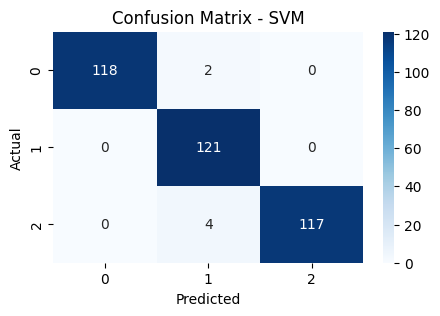

--- Tabel Metrik per Kelas: SVM ---
 Class  TP  FP  FN  TN  Precision  Recall  F1-Score
     0 118   0   2 242       1.00    0.98      0.99
     1 121   6   0 235       0.95    1.00      0.98
     2 117   0   4 241       1.00    0.97      0.98

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       120
           1       0.95      1.00      0.98       121
           2       1.00      0.97      0.98       121

    accuracy                           0.98       362
   macro avg       0.98      0.98      0.98       362
weighted avg       0.98      0.98      0.98       362



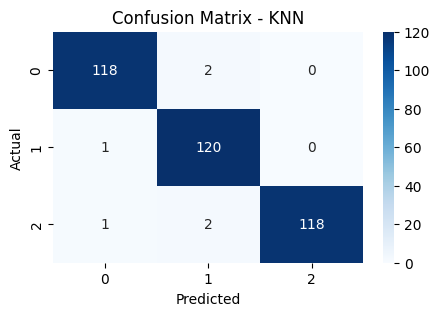

--- Tabel Metrik per Kelas: KNN ---
 Class  TP  FP  FN  TN  Precision  Recall  F1-Score
     0 118   2   2 240       0.98    0.98      0.98
     1 120   4   1 237       0.97    0.99      0.98
     2 118   0   3 241       1.00    0.98      0.99

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.97      0.99      0.98       121
           2       1.00      0.98      0.99       121

    accuracy                           0.98       362
   macro avg       0.98      0.98      0.98       362
weighted avg       0.98      0.98      0.98       362



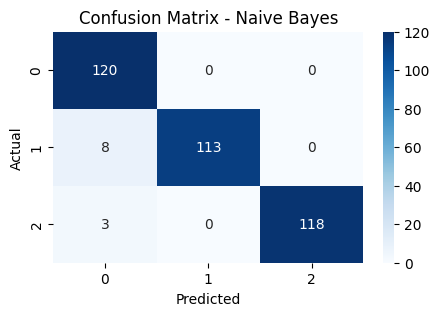

--- Tabel Metrik per Kelas: Naive Bayes ---
 Class  TP  FP  FN  TN  Precision  Recall  F1-Score
     0 120  11   0 231       0.92    1.00      0.96
     1 113   0   8 241       1.00    0.93      0.97
     2 118   0   3 241       1.00    0.98      0.99

Classification Report:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       120
           1       1.00      0.93      0.97       121
           2       1.00      0.98      0.99       121

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [10]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Loop semua model
for model_name, result in results.items():
    y_pred = result['y_pred']
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Tampilkan confusion matrix
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Simpan metrik ke list
    metrics = []

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP
        TN = conf_matrix.sum() - (TP + FP + FN)

        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

        metrics.append({
            'Class': i,
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN,
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-Score': round(f1, 2)
        })

    # Buat dan tampilkan tabel
    df_metrics = pd.DataFrame(metrics)
    print(f"--- Tabel Metrik per Kelas: {model_name} ---")
    print(df_metrics.to_string(index=False))  # index=False agar lebih rapi
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    print("="*60)


Visualisasi Classification Report Klasik Model

In [11]:
from sklearn.metrics import classification_report
import pandas as pd
from IPython.display import display

# Tampilan classification report gunakan IPython display
for model_name, result in results.items():
    print(f"Classification Report - {model_name}")
    report_dict = classification_report(y_test, result['y_pred'], output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    styled_df = report_df.style.background_gradient(cmap='coolwarm').format(precision=3)
    display(styled_df)


Classification Report - SVM


,precision,recall,f1-score,support
0,1.000,0.983,0.992,120.000
1,0.953,1.000,0.976,121.000
2,1.000,0.967,0.983,121.000
accuracy,0.983,0.983,0.983,0.983
macro avg,0.984,0.983,0.984,362.000
weighted avg,0.984,0.983,0.984,362.000


Classification Report - KNN


,precision,recall,f1-score,support
0,0.983,0.983,0.983,120.000
1,0.968,0.992,0.980,121.000
2,1.000,0.975,0.987,121.000
accuracy,0.983,0.983,0.983,0.983
macro avg,0.984,0.983,0.983,362.000
weighted avg,0.984,0.983,0.983,362.000


Classification Report - Naive Bayes


,precision,recall,f1-score,support
0,0.916,1.000,0.956,120.000
1,1.000,0.934,0.966,121.000
2,1.000,0.975,0.987,121.000
accuracy,0.970,0.970,0.970,0.970
macro avg,0.972,0.970,0.970,362.000
weighted avg,0.972,0.970,0.970,362.000


Visualisasi Bar Plor Perbandingan Klasik Model

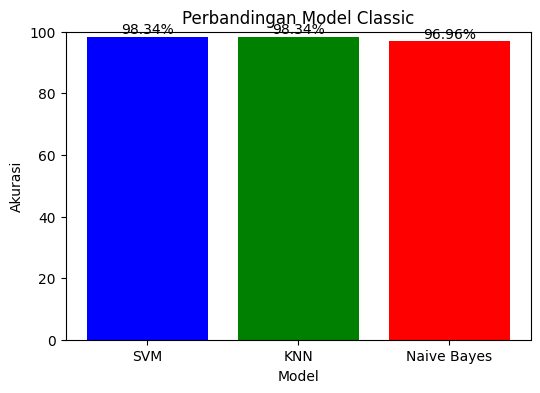

In [12]:
import matplotlib.pyplot as plt

# Plot accuracy bar chart
plt.figure(figsize=(6, 4))
accuracies = [res['accuracy'] * 100 for res in results.values()]
plt.bar(results.keys(), accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Model Classic')
plt.ylim(0, 100)

# Menampilkan nilai akurasi pada masing-masing bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=10)

plt.show()

Training Neural Network + Classic Model (SVM,KNN,NAIVE BAYES)

--- Memulai Pelatihan dan Evaluasi Neural Network (Ensemble) ---

Training NN + SVM...
--- Deteksi Overfitting untuk NN + SVM ---
NN + SVM Akurasi Data Latih Terbaik: 0.9938
NN + SVM Akurasi Data Uji (Validasi) Terbaik: 0.9917
NN + SVM Loss Data Latih Terbaik: 0.0171
NN + SVM Loss Data Uji (Validasi) Terbaik: 0.0213
Analisis Overfitting untuk NN + SVM:
✅ Akurasi data latih dan data uji relatif dekat. Model memiliki kemampuan generalisasi yang baik.


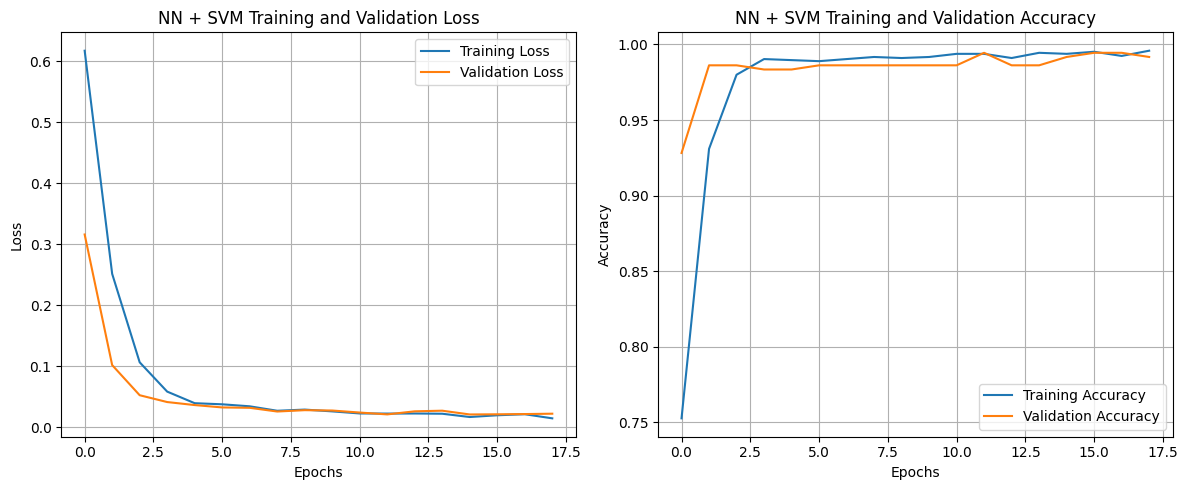

NN + SVM Akurasi Akhir pada Data Uji: 0.9917

Training NN + KNN...
--- Deteksi Overfitting untuk NN + KNN ---
NN + KNN Akurasi Data Latih Terbaik: 0.9924
NN + KNN Akurasi Data Uji (Validasi) Terbaik: 0.9862
NN + KNN Loss Data Latih Terbaik: 0.0258
NN + KNN Loss Data Uji (Validasi) Terbaik: 0.0488
Analisis Overfitting untuk NN + KNN:
✅ Akurasi data latih dan data uji relatif dekat. Model memiliki kemampuan generalisasi yang baik.


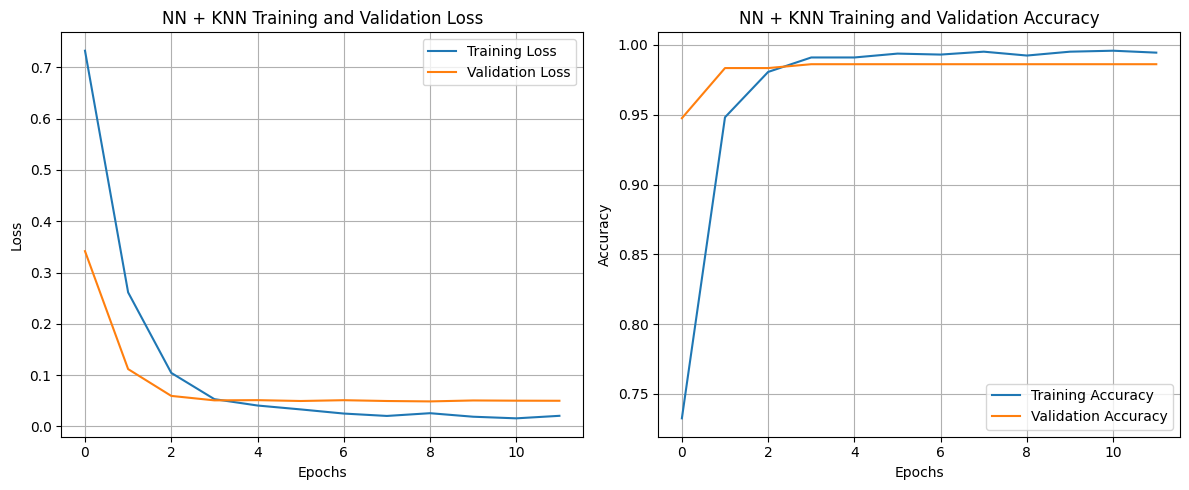

NN + KNN Akurasi Akhir pada Data Uji: 0.9862

Training NN + Naive Bayes...
--- Deteksi Overfitting untuk NN + Naive Bayes ---
NN + Naive Bayes Akurasi Data Latih Terbaik: 0.9841
NN + Naive Bayes Akurasi Data Uji (Validasi) Terbaik: 0.9917
NN + Naive Bayes Loss Data Latih Terbaik: 0.0382
NN + Naive Bayes Loss Data Uji (Validasi) Terbaik: 0.0258
Analisis Overfitting untuk NN + Naive Bayes:
👍 Akurasi data uji sedikit lebih tinggi atau sama. Ini bisa jadi hasil yang baik.


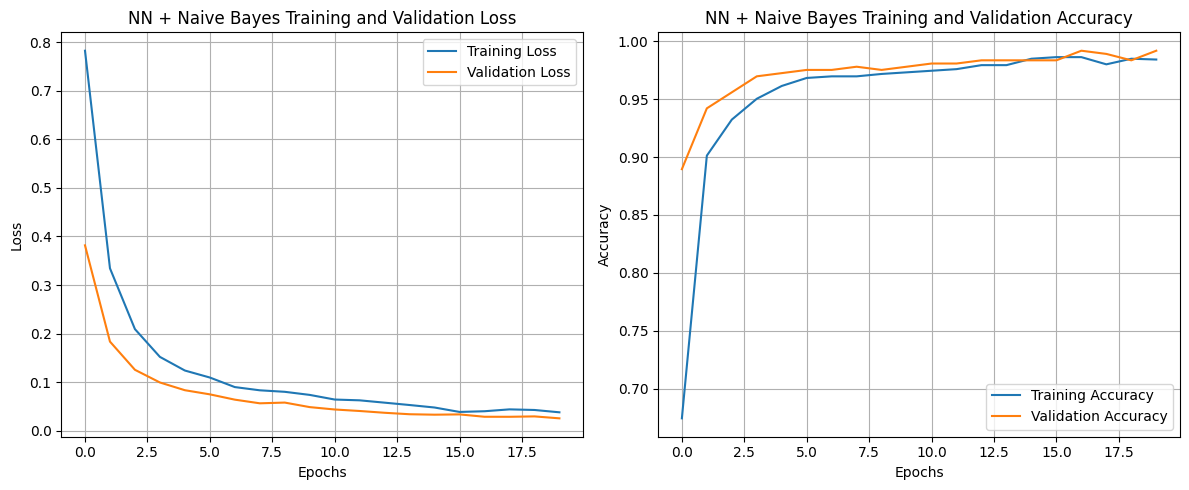

NN + Naive Bayes Akurasi Akhir pada Data Uji: 0.9917

--- Selesai Evaluasi Neural Network (Ensemble) ---


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib untuk plotting

# Definsi Neural Network model
def create_nn(input_shape, output_units):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(output_units, activation='softmax' if output_units > 2 else 'sigmoid')
    ])

    # Perhatikan: Jika Anda menggunakan sparse_categorical_crossentropy, y_train dan y_test
    # harus berupa integer label (misal: 0, 1, 2). Jika sudah one-hot encoded, gunakan 'categorical_crossentropy'.
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy' if output_units > 2 else 'binary_crossentropy',
        metrics=['accuracy']
    )
    return model

output_units = len(np.unique(y_train))
nn_results = {}

print("--- Memulai Pelatihan dan Evaluasi Neural Network (Ensemble) ---")

for model_name, y_proba in predictions.items():
    if y_proba is not None:
        # Pastikan X_train adalah array numpy atau dense tensor jika Naive Bayes menghasilkan sparse
        # Jika X_train_combined akan menjadi sparse, pastikan model NN dapat menanganinya atau konversi ke dense
        if hasattr(X_train, 'toarray'): # Cek jika X_train adalah sparse matrix
            X_train_combined = np.hstack([X_train.toarray(), y_proba])
        else:
            X_train_combined = np.hstack([X_train, y_proba])

        # Lakukan hal yang sama untuk X_test
        model_predict_proba_on_test = models[model_name].predict_proba(X_test)
        if hasattr(X_test, 'toarray'):
            X_test_combined = np.hstack([X_test.toarray(), model_predict_proba_on_test])
        else:
            X_test_combined = np.hstack([X_test, model_predict_proba_on_test])


        model_nn = create_nn(X_train_combined.shape[1], output_units)
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        print(f"\nTraining NN + {model_name}...")
        history = model_nn.fit(X_train_combined, y_train, epochs=20, batch_size=32,
                               validation_data=(X_test_combined, y_test), callbacks=[early_stopping], verbose=0) # verbose=0 untuk output yang lebih ringkas

        # --- Deteksi Overfitting untuk Neural Network ---
        print(f"--- Deteksi Overfitting untuk NN + {model_name} ---")

        # Ambil akurasi dan loss terbaik dari history (setelah early stopping)
        best_epoch = np.argmin(history.history['val_loss'])
        train_accuracy_nn = history.history['accuracy'][best_epoch]
        val_accuracy_nn = history.history['val_accuracy'][best_epoch]
        train_loss_nn = history.history['loss'][best_epoch]
        val_loss_nn = history.history['val_loss'][best_epoch]

        print(f"NN + {model_name} Akurasi Data Latih Terbaik: {train_accuracy_nn:.4f}")
        print(f"NN + {model_name} Akurasi Data Uji (Validasi) Terbaik: {val_accuracy_nn:.4f}")
        print(f"NN + {model_name} Loss Data Latih Terbaik: {train_loss_nn:.4f}")
        print(f"NN + {model_name} Loss Data Uji (Validasi) Terbaik: {val_loss_nn:.4f}")

        print(f"Analisis Overfitting untuk NN + {model_name}:")
        if train_accuracy_nn > val_accuracy_nn and (train_accuracy_nn - val_accuracy_nn) > 0.02: # Ambang batas lebih kecil untuk NN
            print("⚠️ Potensi **Overfitting** terdeteksi!")
            print(f"  Akurasi data latih ({train_accuracy_nn:.4f}) jauh lebih tinggi daripada akurasi data uji ({val_accuracy_nn:.4f}).")
            print("  Model mungkin terlalu 'menghafal' data pelatihan.")
        elif train_accuracy_nn < val_accuracy_nn:
            print("👍 Akurasi data uji sedikit lebih tinggi atau sama. Ini bisa jadi hasil yang baik.")
        else:
            print("✅ Akurasi data latih dan data uji relatif dekat. Model memiliki kemampuan generalisasi yang baik.")

        # Plot Learning Curves
        plt.figure(figsize=(12, 5))

        # Plot Loss
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'NN + {model_name} Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        # Plot Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'NN + {model_name} Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Evaluasi akhir pada data uji
        loss, acc = model_nn.evaluate(X_test_combined, y_test, verbose=0) # verbose=0 untuk output yang ringkas
        nn_results[model_name] = acc * 100
        print(f"NN + {model_name} Akurasi Akhir pada Data Uji: {acc:.4f}")

    else:
        print(f"\nMelewatkan NN + {model_name} karena y_proba tidak tersedia.")

print("\n--- Selesai Evaluasi Neural Network (Ensemble) ---")

Visualisasi Confusion Matrix Hybrid Model


--- NN + SVM ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


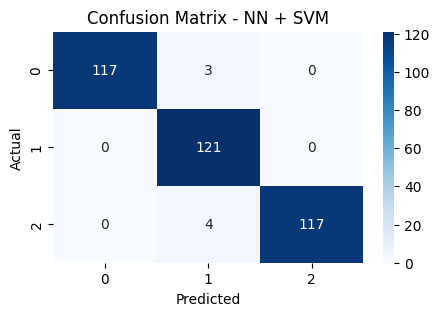

 Class  TP  FP  FN  TN  Precision  Recall  F1-Score
     0 117   0   3 242       1.00    0.98      0.99
     1 121   7   0 234       0.95    1.00      0.97
     2 117   0   4 241       1.00    0.97      0.98

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       120
           1       0.95      1.00      0.97       121
           2       1.00      0.97      0.98       121

    accuracy                           0.98       362
   macro avg       0.98      0.98      0.98       362
weighted avg       0.98      0.98      0.98       362


--- NN + KNN ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


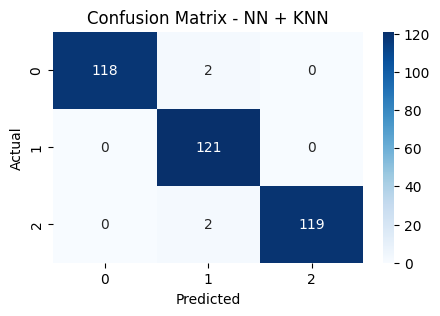

 Class  TP  FP  FN  TN  Precision  Recall  F1-Score
     0 118   0   2 242       1.00    0.98      0.99
     1 121   4   0 237       0.97    1.00      0.98
     2 119   0   2 241       1.00    0.98      0.99

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       120
           1       0.97      1.00      0.98       121
           2       1.00      0.98      0.99       121

    accuracy                           0.99       362
   macro avg       0.99      0.99      0.99       362
weighted avg       0.99      0.99      0.99       362


--- NN + Naive Bayes ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


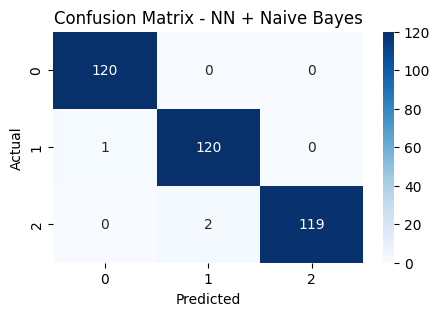

 Class  TP  FP  FN  TN  Precision  Recall  F1-Score
     0 120   1   0 241       0.99    1.00      1.00
     1 120   2   1 239       0.98    0.99      0.99
     2 119   0   2 241       1.00    0.98      0.99

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       120
           1       0.98      0.99      0.99       121
           2       1.00      0.98      0.99       121

    accuracy                           0.99       362
   macro avg       0.99      0.99      0.99       362
weighted avg       0.99      0.99      0.99       362



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

# Plot confusion matrix dan tampilkan metrik per kelas
for model_name, y_proba in predictions.items():
    if y_proba is not None:
        print(f"\n--- NN + {model_name} ---")
        X_test_combined = np.hstack([X_test, models[model_name].predict_proba(X_test)])
        y_pred_nn = np.argmax(model_nn.predict(X_test_combined), axis=1)

        conf_matrix = confusion_matrix(y_test, y_pred_nn)

        # Plot
        plt.figure(figsize=(5, 3))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - NN + {model_name}')
        plt.show()

        # Hitung dan tampilkan TP, FP, FN, TN per kelas
        metrics_data = []
        for i in range(len(conf_matrix)):
            TP = conf_matrix[i, i]
            FP = conf_matrix[:, i].sum() - TP
            FN = conf_matrix[i, :].sum() - TP
            TN = conf_matrix.sum() - (TP + FP + FN)

            precision = TP / (TP + FP) if (TP + FP) != 0 else 0
            recall = TP / (TP + FN) if (TP + FN) != 0 else 0
            f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

            metrics_data.append([i, TP, FP, FN, TN, round(precision, 2), round(recall, 2), round(f1, 2)])

        df_metrics = pd.DataFrame(metrics_data, columns=['Class', 'TP', 'FP', 'FN', 'TN', 'Precision', 'Recall', 'F1-Score'])
        print(df_metrics.to_string(index=False))

        # Tampilkan classification report
        print("\nClassification Report:\n")
        print(classification_report(y_test, y_pred_nn))


Visualisasi Classification Report Hybrid Model

In [15]:
from sklearn.metrics import classification_report
import pandas as pd
from IPython.display import display
import numpy as np

# Display classification report untuk NN + Classic Model
for model_name, y_proba in predictions.items():
    if y_proba is not None:
        X_test_combined = np.hstack([X_test, models[model_name].predict_proba(X_test)])
        y_pred_nn = np.argmax(model_nn.predict(X_test_combined), axis=1)

        print(f"Classification Report - NN + {model_name}")
        report_dict = classification_report(y_test, y_pred_nn, output_dict=True)
        report_df = pd.DataFrame(report_dict).transpose()
        styled_df = report_df.style.background_gradient(cmap='coolwarm').format(precision=3)
        display(styled_df)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report - NN + SVM


,precision,recall,f1-score,support
0,1.000,0.975,0.987,120.000
1,0.945,1.000,0.972,121.000
2,1.000,0.967,0.983,121.000
accuracy,0.981,0.981,0.981,0.981
macro avg,0.982,0.981,0.981,362.000
weighted avg,0.982,0.981,0.981,362.000


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report - NN + KNN


,precision,recall,f1-score,support
0,1.000,0.983,0.992,120.000
1,0.968,1.000,0.984,121.000
2,1.000,0.983,0.992,121.000
accuracy,0.989,0.989,0.989,0.989
macro avg,0.989,0.989,0.989,362.000
weighted avg,0.989,0.989,0.989,362.000


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report - NN + Naive Bayes


,precision,recall,f1-score,support
0,0.992,1.000,0.996,120.000
1,0.984,0.992,0.988,121.000
2,1.000,0.983,0.992,121.000
accuracy,0.992,0.992,0.992,0.992
macro avg,0.992,0.992,0.992,362.000
weighted avg,0.992,0.992,0.992,362.000


Visualisasi Bar Plot Hybrid Model

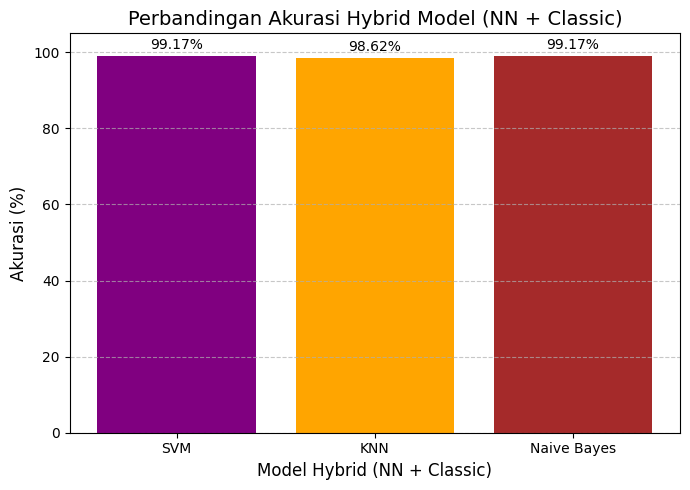

In [16]:
import matplotlib.pyplot as plt

# Pastikan nilai akurasi dalam nn_results berupa persen, misal: 98.34, 98.90, dll.
plt.figure(figsize=(7, 5))
colors = ['purple', 'orange', 'brown']

# Bar chart
bars = plt.bar(nn_results.keys(), nn_results.values(), color=colors)

# Label sumbu dan judul
plt.xlabel('Model Hybrid (NN + Classic)', fontsize=12)
plt.ylabel('Akurasi (%)', fontsize=12)
plt.title('Perbandingan Akurasi Hybrid Model (NN + Classic)', fontsize=14)
plt.ylim(0, 105)  # memberi ruang untuk label di atas bar

# Tambahkan label nilai di atas tiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1,
             f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)

# Tambahan estetika
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Visualisasi Perbandingan All Models

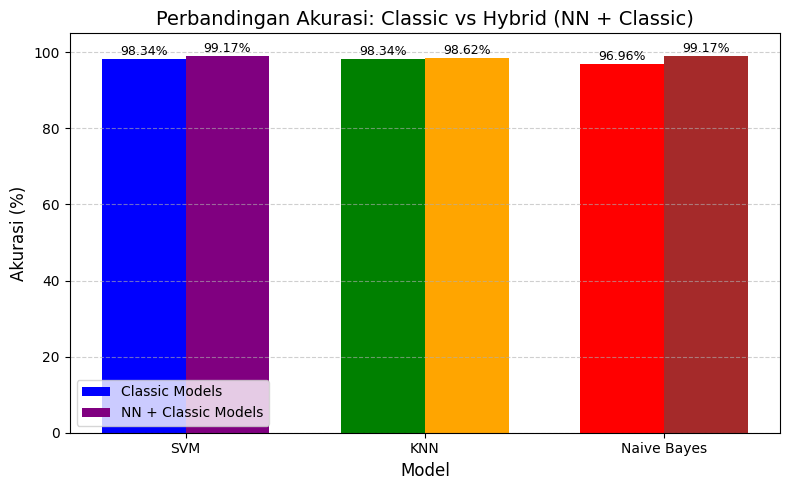

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Model dan akurasi
classic_model_names = list(results.keys())  # ['SVM', 'KNN', 'Naive Bayes']
hybrid_model_names = [f"NN + {name}" for name in classic_model_names]

classic_accuracies = [res['accuracy'] * 100 for res in results.values()]
hybrid_accuracies = [nn_results[name] for name in classic_model_names]

x = np.arange(len(classic_model_names))  # posisi X untuk setiap grup model
width = 0.35  # lebar tiap bar

# Plotting
plt.figure(figsize=(8, 5))
bars1 = plt.bar(x - width/2, classic_accuracies, width, label='Classic Models', color=['blue', 'green', 'red'])
bars2 = plt.bar(x + width/2, hybrid_accuracies, width, label='NN + Classic Models', color=['purple', 'orange', 'brown'])

# Menambahkan label nilai di atas bar
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%", ha='center', fontsize=9)

# Label dan tata letak
plt.xlabel('Model', fontsize=12)
plt.ylabel('Akurasi (%)', fontsize=12)
plt.title('Perbandingan Akurasi: Classic vs Hybrid (NN + Classic)', fontsize=14)
plt.xticks(x, classic_model_names)  # label sumbu x hanya sekali untuk tiap grup
plt.ylim(0, 105)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
